In [2]:
# Imports needed to complete this exam
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#First create a Pandas DataFrame called employee
employee=pd.DataFrame()
#Next Load alumni.csv into employee DataFrame
employee=pd.read_csv('employee.csv')
#display first 5 rows for all columns
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#Checking for NAN values
nan_employee=employee[employee.isna().any(axis=1)]
nan_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [6]:
#Checking for NULL values
employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
#Based on your analysis in Assignment 2,
#Express your results in the form of the most appropriate visualization using any visualization library of your choice.
#qn-1: Show a breakdown of distance from home by Job Role and attrition
# The Question requires analysis of how distance from home impacts attrition by JobRole
#This will be possible by use of groupby function on columns of Attrition and JobRole
#Sum of the DistanceFromHome will be used in this analysis
employee.groupby(['JobRole','Attrition'])['DistanceFromHome'].sum()

JobRole                    Attrition
Healthcare Representative  No           1123
                           Yes           159
Human Resources            No            264
                           Yes           161
Laboratory Technician      No           1838
                           Yes           599
Manager                    No            769
                           Yes            50
Manufacturing Director     No           1287
                           Yes            88
Research Director          No            661
                           Yes            14
Research Scientist         No           2173
                           Yes           459
Sales Executive            No           2428
                           Yes           721
Sales Representative       No            450
                           Yes           269
Name: DistanceFromHome, dtype: int64

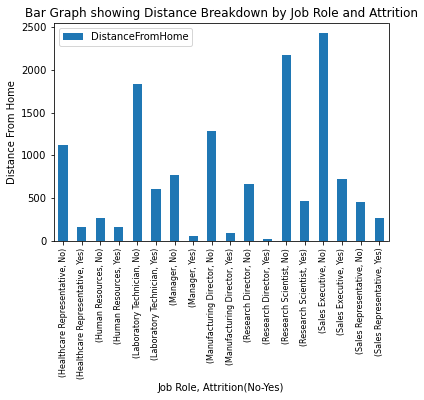

In [6]:
#By plotting the above data in bar graph will help get better insight into our data
employee.groupby(['JobRole','Attrition'])['DistanceFromHome'].sum().plot(kind='bar')
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Distance From Home')
plt.xlabel('Job Role, Attrition(No-Yes)')
plt.title('Bar Graph showing Distance Breakdown by Job Role and Attrition')
plt.legend()
plt.show()

In [17]:
#ANALYSIS OF THE ABOVE DATA AND GRAPH
print('From the above graph, its observed that employees who leave the IBM organization are sales executives, laboratory technicians\nand research scientists respectively. Its also generally observed that for every jobrole, more employees stay(Attrition-No) as opposed to those who leave (Attrition-Yes)\n\nThe company can thus find means to retain some of their employees such as hiring a bus or reducing the daily distance through\nworking in shifts especially for sales executives, laboratory techniciansand research scientists')


From the above graph, its observed that employees who leave the IBM organization are sales executives, laboratory technicians
and research scientists respectively. Its also generally observed that for every jobrole, more employees stay(Attrition-No) as opposed to those who leave (Attrition-Yes)

The company can thus find means to retain some of their employees such as hiring a bus or reducing the daily distance through
working in shifts especially for sales executives, laboratory techniciansand research scientists


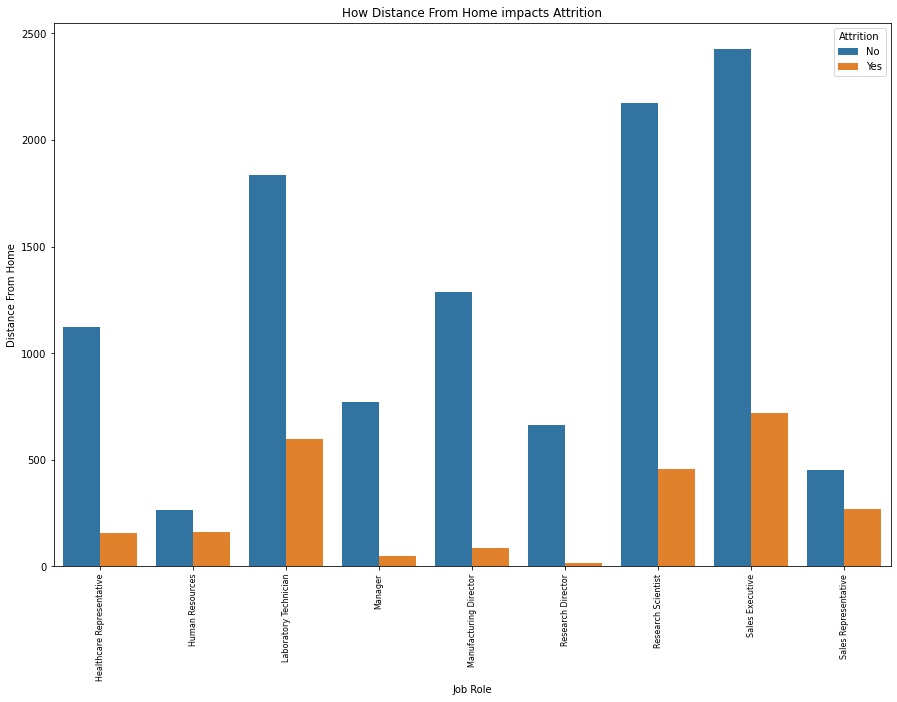

In [18]:
# Lets say further assess the trends using Seaborn
%matplotlib inline
plt.figure(figsize=(15,10))
employee_distance=employee.groupby(["JobRole", "Attrition"])["DistanceFromHome"].sum().reset_index()
sns.barplot(x="JobRole", y="DistanceFromHome", hue="Attrition",data=employee_distance)
plt.title("How Distance From Home impacts Attrition")
plt.xlabel("Job Role")
plt.ylabel("Distance From Home")
plt.xticks(rotation='vertical', size=8)
plt.show()

<Figure size 432x288 with 0 Axes>

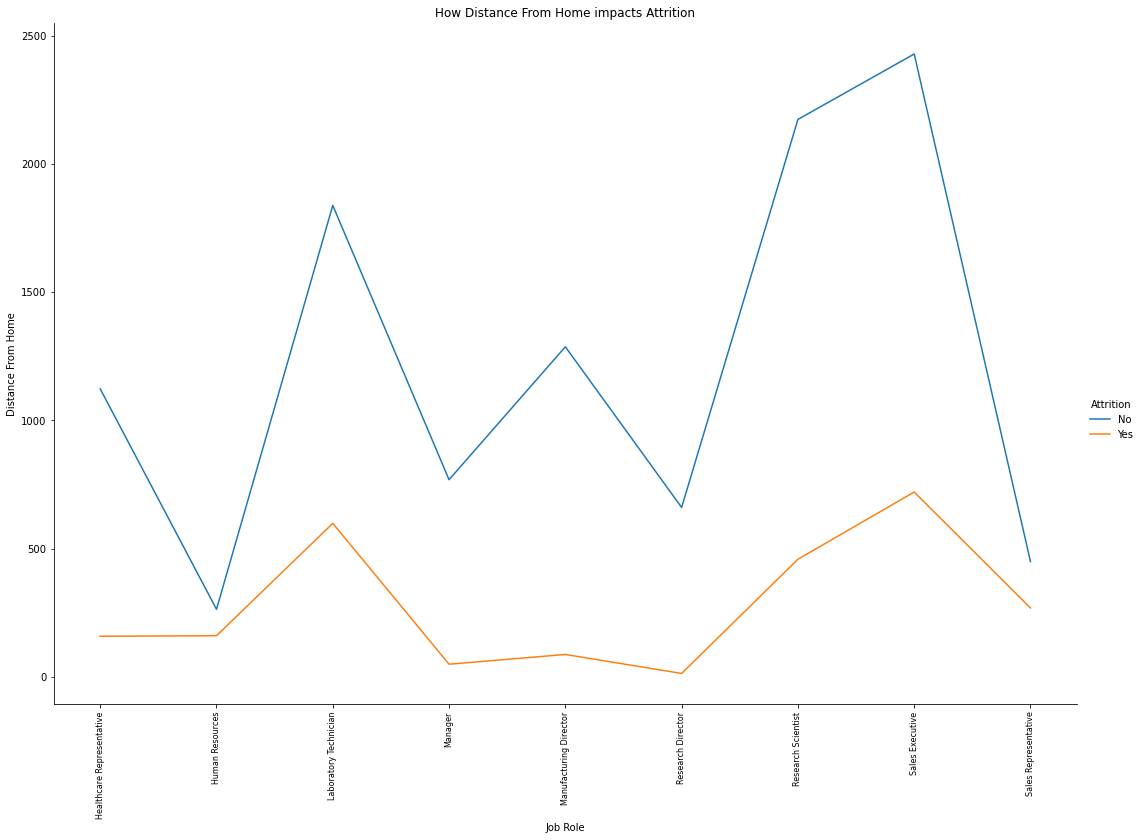

In [19]:
%matplotlib inline
plt.figure()
sns.relplot(x="JobRole", y="DistanceFromHome", hue="Attrition", kind="line", data=employee_distance, height=10, aspect=15/10)
plt.title("How Distance From Home impacts Attrition")
plt.xlabel("Job Role")
plt.ylabel("Distance From Home")
plt.xticks(rotation='vertical', size=8)
plt.show()

In [22]:
#Comparison of Trends between Pandas and Seaborn
print('Trends from Seaborn(Bar and line graphs) agree with those of Pandas analysis thereby confirming accuracy in results')

Trends from Seaborn(Bar and line graphs) agree with those of Pandas analysis thereby confirming accuracy in results


In [57]:
#qn-2: Compare average monthly income by education and Attrition
# The Question requires analysis of how average monthly income impacts attrition based on Education
#This will be possible by use of groupby function on columns of Attrition and Education
#Mean Monthly Income will be used in this analysis
#employee.groupby(['Education','Attrition'])['MonthlyIncome'].mean().plot(kind='bar')
employee.groupby(['Education','Attrition'])['MonthlyIncome'].mean()

Education  Attrition
1          No           5926.129496
           Yes          4360.161290
2          No           6586.058824
           Yes          4282.545455
3          No           6882.919662
           Yes          4770.242424
4          No           7087.814706
           Yes          5335.155172
5          No           8559.906977
           Yes          5850.200000
Name: MonthlyIncome, dtype: float64

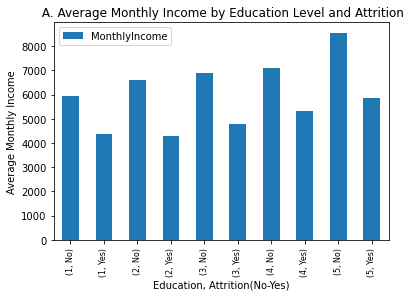

In [81]:
employee.groupby(['Education','Attrition'])['MonthlyIncome'].mean().plot(kind='bar')
plt.xticks(rotation='vertical', size=8)
plt.ylabel('Average Monthly Income')
plt.xlabel('Education, Attrition(No-Yes)')
plt.title(' A. Average Monthly Income by Education Level and Attrition')
plt.legend()
plt.show()

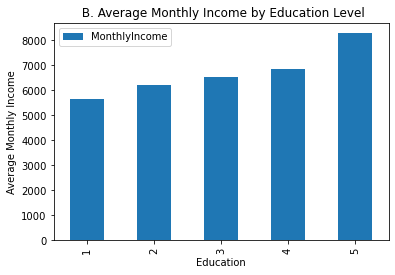

In [79]:
employee.groupby(['Education'])['MonthlyIncome'].mean().plot(kind='bar')
plt.ylabel('Average Monthly Income')
plt.xlabel('Education')
plt.title(' B. Average Monthly Income by Education Level')
plt.legend()
plt.show()


In [23]:
print('From the above graphs, its observed that the average monthly income raises from education level-1 to education level-5(Graph-B) for both employees who stay (Attrition-No) and leave(Attrition-Yes).\n\nIts also observed from graph-A that employees who leave the organization(attrition-Yes) have their average monthly income lower than those who stay (attrition-No) as noticed from all education levels(1-5).\n\nThis could be due to employees earning unequal salaries or not getting some allowances.\n\nThe IBM organization can thus look into raising salaries for the different eduaction levels, offering allowances such as\ntransport/housing as well as offering financial guidance for those over spending  ')

From the above graphs, its observed that the average monthly income raises from education level-1 to education level-5(Graph-B) for both employees who stay (Attrition-No) and leave(Attrition-Yes).

Its also observed from graph-A that employees who leave the organization(attrition-Yes) have their average monthly income lower than those who stay (attrition-No) as noticed from all education levels(1-5).

This could be due to employees earning unequal salaries or not getting some allowances.

The IBM organization can thus look into raising salaries for the different eduaction levels, offering allowances such as
transport/housing as well as offering financial guidance for those over spending  


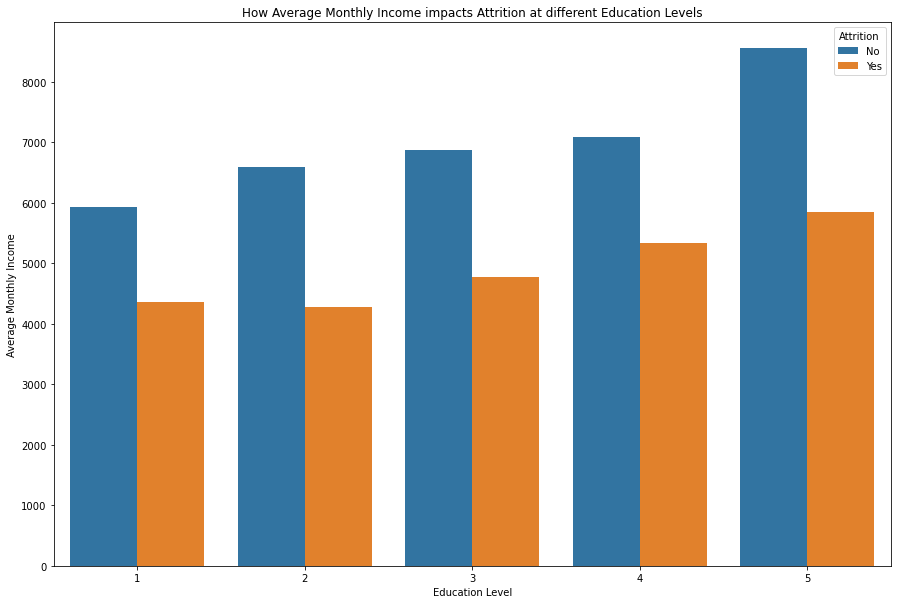

In [77]:
# Lets say further assess the trends using Seaborn
%matplotlib inline
plt.figure(figsize=(15,10))
employee_distance=employee.groupby(["Education", "Attrition"])["MonthlyIncome"].mean().reset_index()
sns.barplot(x="Education", y="MonthlyIncome", hue="Attrition",data=employee_distance)
plt.title("How Average Monthly Income impacts Attrition at different Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Average Monthly Income")
plt.show()


<Figure size 432x288 with 0 Axes>

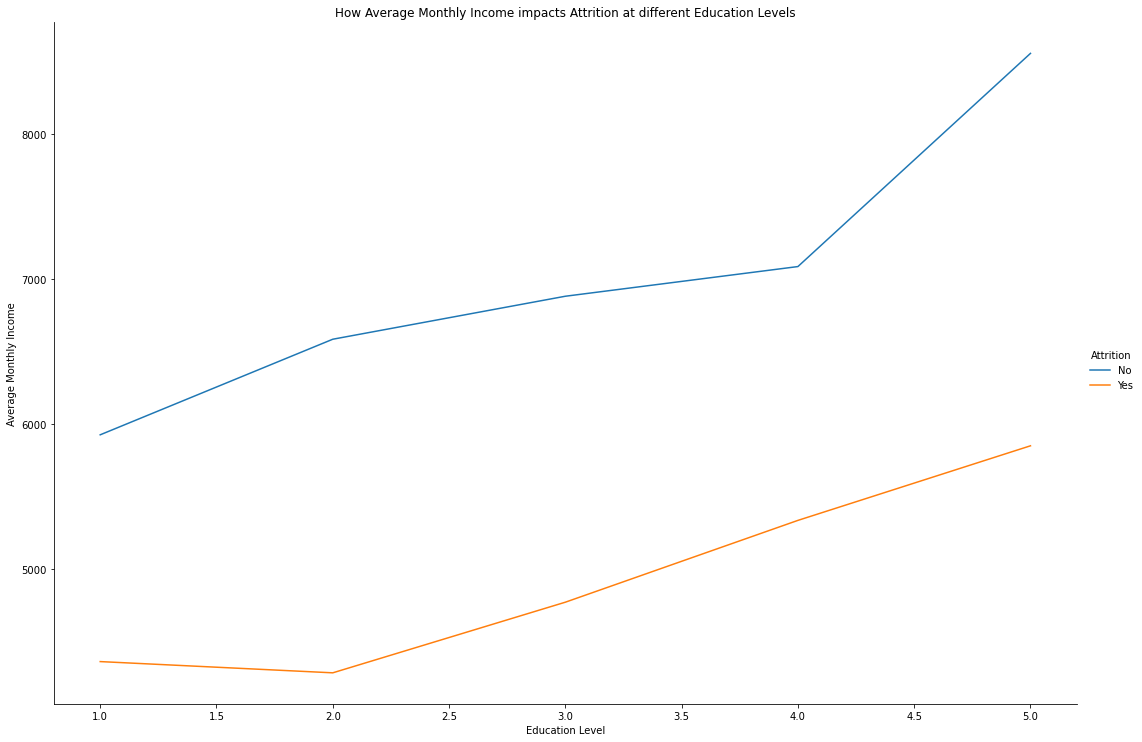

In [76]:
%matplotlib inline
#Distance
#employee_distance=employee.groupby(["JobRole", "Attrition"])["DistanceFromHome"].sum().reset_index()
plt.figure()
sns.relplot(x="Education", y="MonthlyIncome", hue="Attrition", kind="line", data=employee_distance, height=10, aspect=15/10)
plt.title("How Average Monthly Income impacts Attrition at different Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Average Monthly Income")
plt.show()

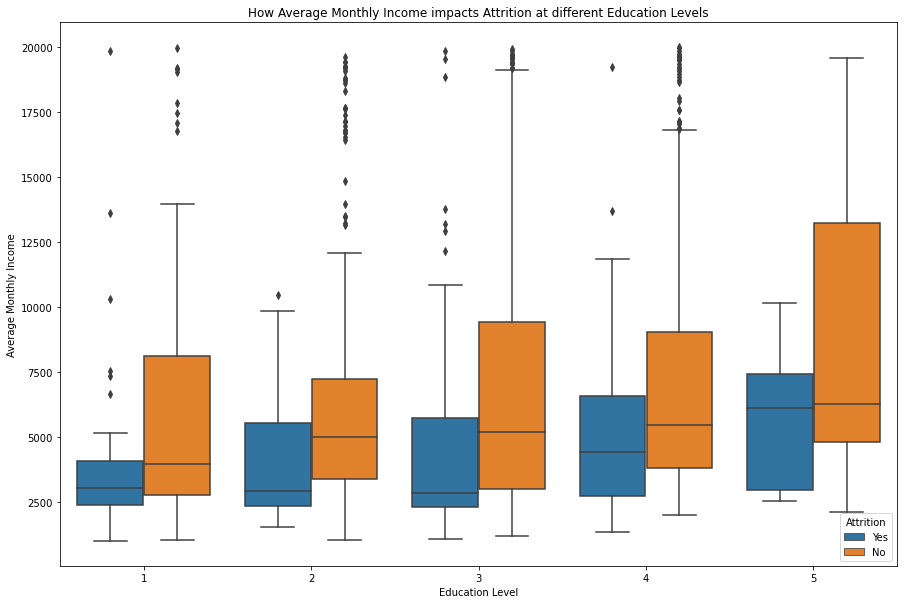

In [84]:
plt.figure(figsize =(15, 10)) 
sns.boxplot(y ='MonthlyIncome', x ='Education',hue="Attrition",data = employee)
plt.title("How Average Monthly Income impacts Attrition at different Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Average Monthly Income")
plt.show()

In [89]:
#Comparison of Trends between Pandas and Seaborn
print('Trends from Seaborn(Bar/line graphs and box plot) agree with those of Pandas analysis thereby confirming accuracy in results')

Trends from Seaborn(Bar/line graphs and box plot) agree with those of Pandas analysis thereby confirming accuracy in results
